# Hurricane Erin

A Tropical cyclone is a non-frontal synoptic-scale low-pressure system characterized by:

- well defined, low-pressure center
- a closed low-level atmospheric circulation
- strong winds
- a spiral arrangement of thunderstorms that produce heavy rain and squalls Northern Hemisphere)
- warm core
- \~ 100 - 2,000 km diameters.

Environmental conditions:

- min. 26.5 °C sea surface temperature (tropical/subtropical conditions)
- energy heat potential
- Coriolis force
- low vertical wind shear
- high humidity

## Tasks

Plotting the entire trajectory of a specific Tropical Cyclone occurred in the North Atlantic basin in a specific time interval.

- Name: ERIN
- SID: 2001245N13326
- Start: 2001-09-01 18:00:00
- End: 2001-09-17 00:00:00
  
The TC information should be gathered from the IBTrACS dataset related to the North Atlantic basin available at: https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ (download the file named `ibtracs.NA.list.v04r00.csv`).

For the trajectory visualization, the following frameworks can be used:

1. pandas
2. Cartopy
3. matplotlib

The map should clearly show if the TC makes landfall or not during its lifetime. The expected result is the following:

1. Visualization of the trajectory map showing if the TC makes landfall or not

In [1]:
import os
import numpy as np
import pandas as pd
import xarray
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import shapely.geometry as sgeom

# Generate the wind animation in GIF format
from PIL import Image

## Load IBTrACS dataset

First, lets load the TC database and analyze the data.

In [2]:
df = pd.read_csv(
    "ibtracs.NA.list.v04r00.csv",
    skiprows=[1],
    usecols=["SID", "SEASON", "NUMBER", "NAME", "ISO_TIME", "NATURE", "LAT", "LON"])

In [3]:
df

,SID,SEASON,NUMBER,NAME,ISO_TIME,NATURE,LAT,LON
0,1851175N26270,1851,5,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000
1,1851175N26270,1851,5,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999
2,1851175N26270,1851,5,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000
3,1851175N26270,1851,5,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001
4,1851175N26270,1851,5,NOT_NAMED,1851-06-24 00:00:00,TS,26.5000,-91.6000
...,...,...,...,...,...,...,...,...
124749,2022230N16272,2022,48,NOT_NAMED,2022-08-20 12:00:00,NR,23.1527,-96.1896
124750,2022230N16272,2022,48,NOT_NAMED,2022-08-20 15:00:00,NR,23.6345,-96.5887
124751,2022230N16272,2022,48,NOT_NAMED,2022-08-20 18:00:00,NR,24.1000,-97.0000
124752,2022230N16272,2022,48,NOT_NAMED,2022-08-20 21:00:00,NR,24.4824,-97.3377


Locate the ERIN TC using the SID field.

In [4]:
erin = df[(df["SID"] == "2001245N13326")]
erin = erin.rename({"ISO_TIME": "time"}, axis=1)
erin = erin.set_index(pd.to_datetime(erin["time"]), drop=True)
erin

,SID,SEASON,NUMBER,NAME,time,NATURE,LAT,LON
time,,,,,,,,
2001-09-01 18:00:00,2001245N13326,2001,54,ERIN,2001-09-01 18:00:00,TS,12.5000,-34.3000
2001-09-01 21:00:00,2001245N13326,2001,54,ERIN,2001-09-01 21:00:00,TS,12.7104,-35.0972
2001-09-02 00:00:00,2001245N13326,2001,54,ERIN,2001-09-02 00:00:00,TS,12.9000,-35.9000
2001-09-02 03:00:00,2001245N13326,2001,54,ERIN,2001-09-02 03:00:00,TS,13.0573,-36.7076
2001-09-02 06:00:00,2001245N13326,2001,54,ERIN,2001-09-02 06:00:00,TS,13.2000,-37.5000
...,...,...,...,...,...,...,...,...
2001-09-16 12:00:00,2001245N13326,2001,54,ERIN,2001-09-16 12:00:00,ET,61.5000,-42.0000
2001-09-16 15:00:00,2001245N13326,2001,54,ERIN,2001-09-16 15:00:00,ET,62.2104,-40.5388
2001-09-16 18:00:00,2001245N13326,2001,54,ERIN,2001-09-16 18:00:00,ET,63.0000,-38.9000


In [5]:
lats, lons = erin["LAT"].values, erin["LON"].values
natures = erin["NATURE"].values

Plot the trajectory of the TC:

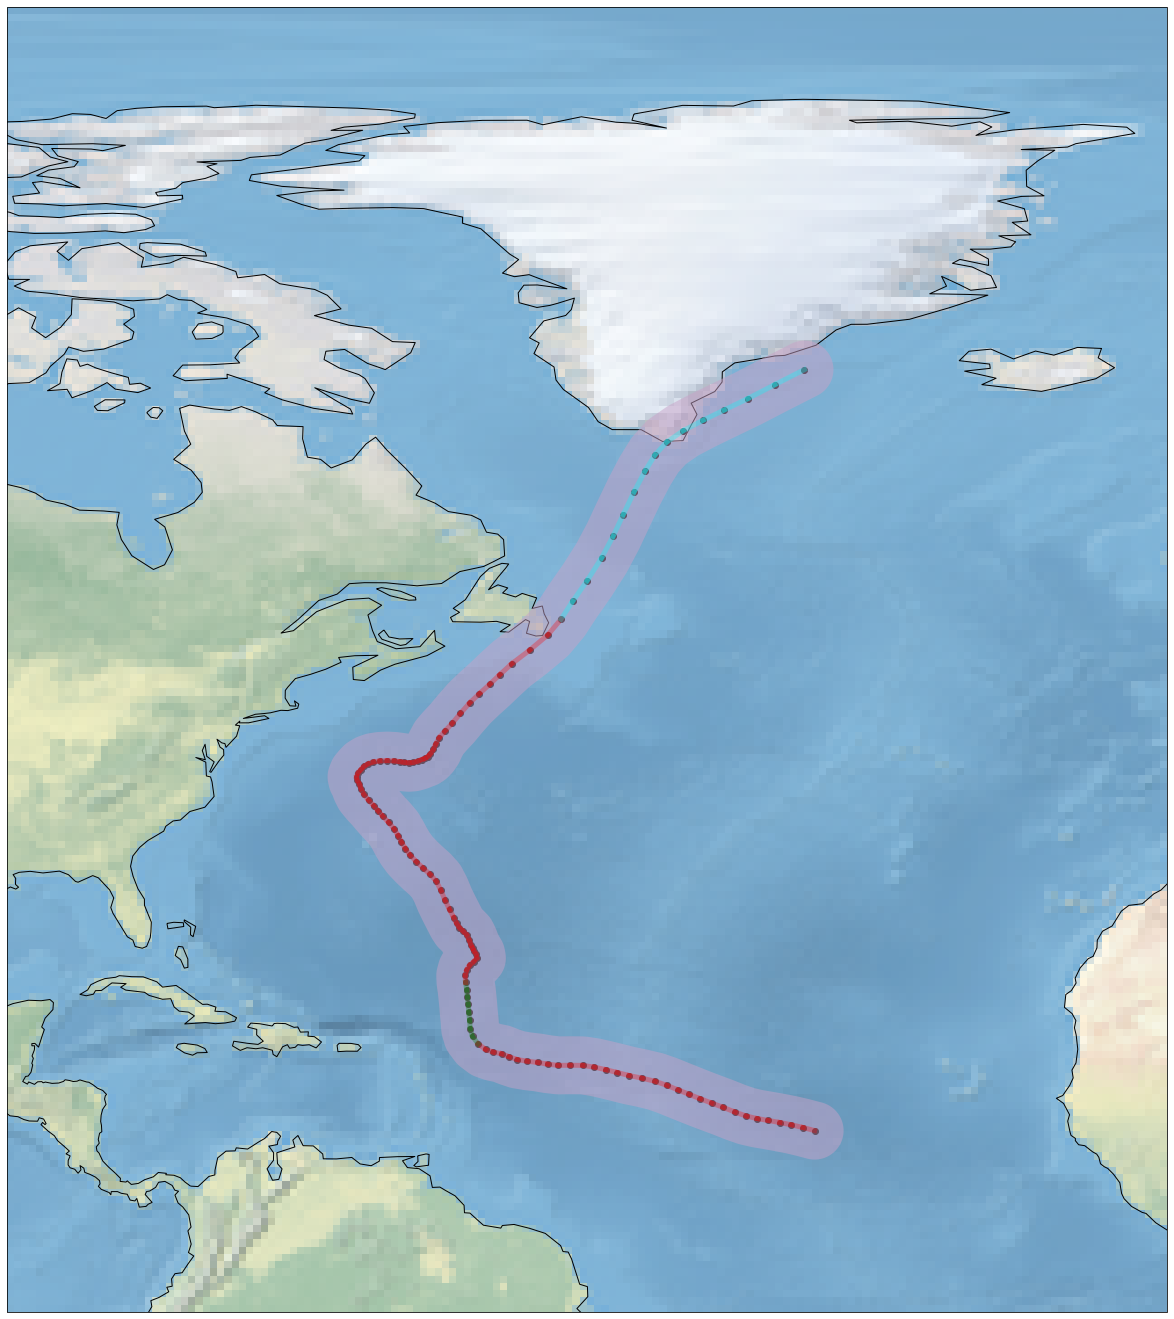

In [6]:
fig=plt.figure(figsize=(32,24))
ax=fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent((-90,-10,90,0), ccrs.PlateCarree())
ax.coastlines() # works because it is geoaxes

colors = {
    "TS": "r",
    "DS": "g",
    "ET": "cyan",
}

track = sgeom.LineString(zip(lons, lats))
# buffer the linestring by two degrees (note: this is a non-physical distance)
track_buffer = track.buffer(2)
ax.add_geometries([track_buffer], ccrs.PlateCarree(),
    facecolor='#C8A2C8', alpha=0.5)

# draw points
for i,coords in enumerate(zip(lats, lons)):
    plt.scatter(coords[1], coords[0], c="black", transform=ccrs.PlateCarree())
    if i > 0:
        plt.plot((lons[i-1],lons[i]), (lats[i-1],lats[i]), transform=ccrs.PlateCarree(),color=colors[natures[i]],alpha=0.3,linewidth=5)

plt.show()

## Use ERA5 dataset to plot climate variables of the TC

In [7]:
ds = xarray.open_dataset("era5.nc")

In [8]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 281, time: 136)
Coordinates:
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2001-09-01 ... 2001-09-17T21:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-03 12:55:44 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [9]:
wind = np.sqrt(ds["u10"]**2 + ds["v10"]**2)

In [10]:
os.makedirs("images", exist_ok=True)
fig=plt.figure(figsize=(16,12))
n = len(wind.coords["time"])

for t in range(n):
    ax=fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    
    p = wind.isel(time=t).plot(
        transform=ccrs.PlateCarree(),
        ax=ax,
        vmin=-2, vmax=32,  
        cbar_kwargs={"label": "Wind speed m/s"},
        cmap="RdYlBu_r",
    )
    p.axes.set_global()
    p.axes.coastlines()
    p.axes.set_extent((-90,-10,70,0), ccrs.PlateCarree())

    plt.quiver(ds.coords["longitude"][::10], ds.coords["latitude"][::10], ds["u10"][t,::10,::10], ds["v10"][t,::10,::10]) 

    p.axes.add_geometries([track_buffer], ccrs.PlateCarree(),
         facecolor='#C8A2C8', alpha=0.5)

    plt.savefig("images/wind{}.png".format(t))
    fig.clear()

<Figure size 1152x864 with 0 Axes>

Generate the animated GIF.

In [11]:
imgs = (Image.open("images/wind{}.png".format(i)) for i in range(n))
img = next(imgs)  # extract first image from iterator
img.save(fp="wind.gif", format='GIF', append_images=imgs, save_all=True, duration=100, loop=0, disposal=2)

![SegmentLocal](wind.gif "segment")